# Linear regression, model complexity and regularization


In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)

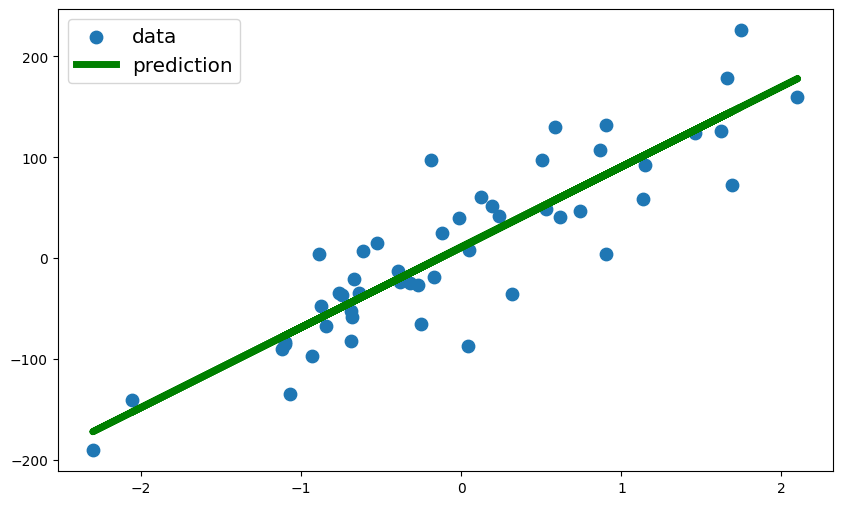

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X, y, s=80, label='data')

lr = LinearRegression().fit(X, y)

plt.plot(X, lr.predict(X), label='prediction', c='g', linewidth=5)
plt.legend(fontsize="x-large")

## Feature exapnasion

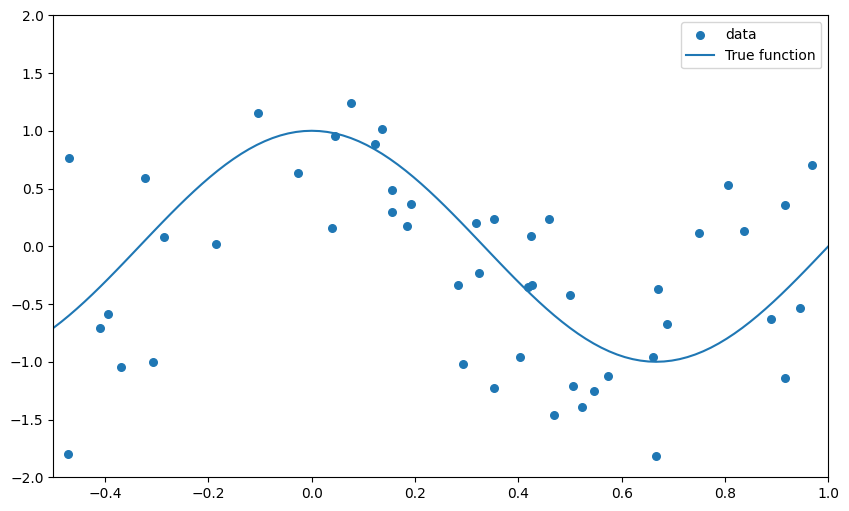

In [3]:
import numpy as np


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 50
degrees = [1, 4, 15]

X = np.sort(np.random.uniform(-.5, 1, n_samples))
y = true_fun(X) + np.random.normal(0, .7, n_samples)

X_plot = np.linspace(-.5, 1, 100)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, label='data')
plt.plot(X_plot, true_fun(X_plot), label="True function")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

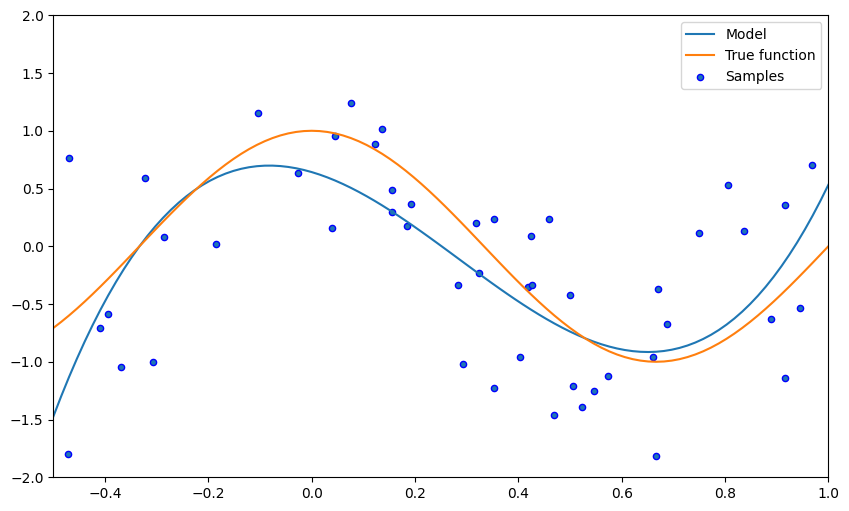

In [4]:
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=3, include_bias=True)
X_expanded = polynomial_features.fit_transform(X)

model = LinearRegression().fit(X_expanded, y)
y_pred = model.predict(polynomial_features.transform(X_plot.reshape(-1, 1)))


plt.figure(figsize=(10, 6))

plt.plot(X_plot, y_pred, label="Model")
plt.plot(X_plot, true_fun(X_plot), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

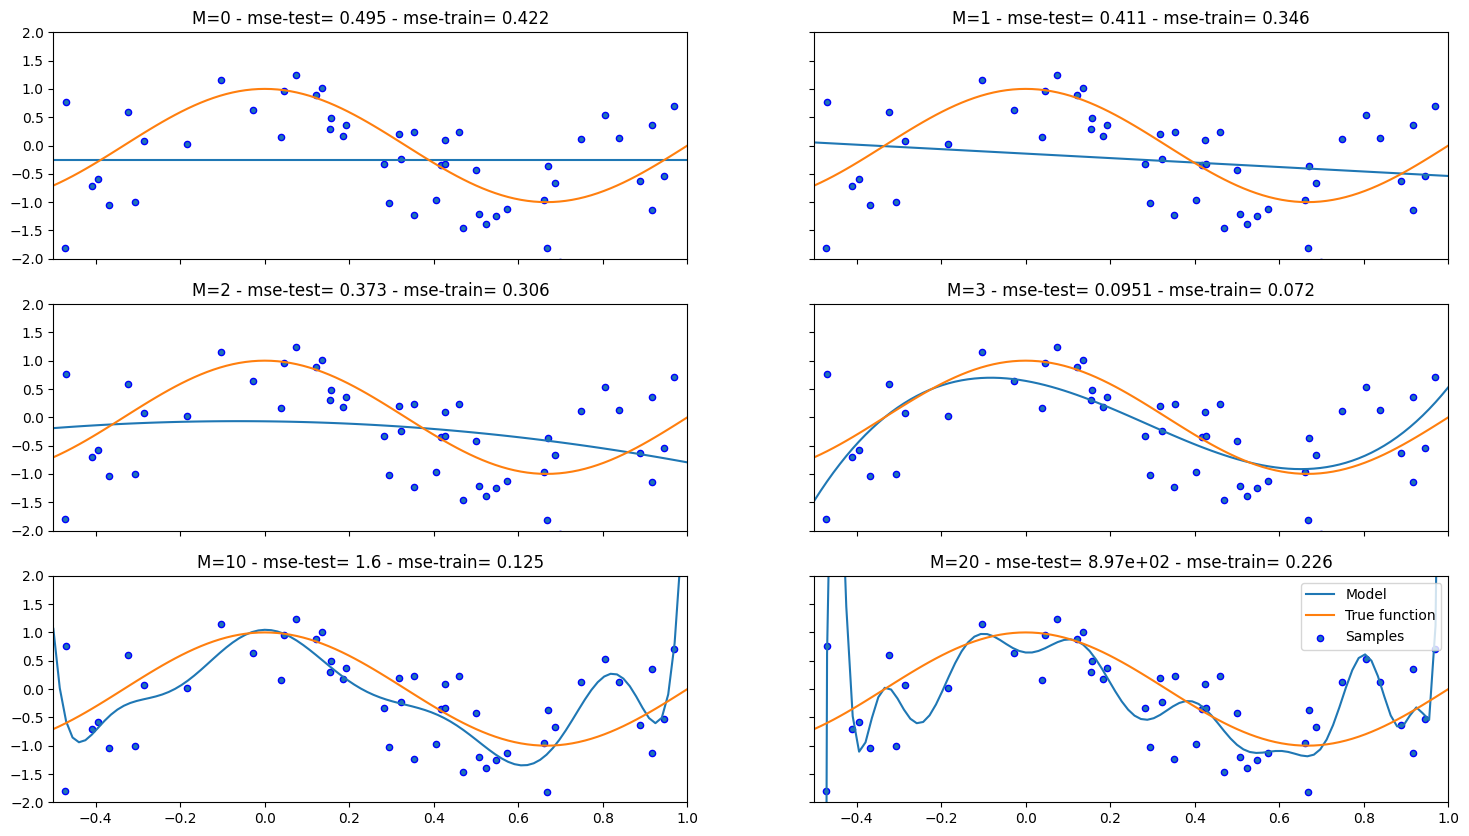

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

X = X.reshape(-1, 1)

_, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 10))

model_coeficients = {}

X_test = np.linspace(-.5, 1, 20)
y_test = true_fun(X_test) + np.random.normal(0, .7, 20)

for i, d in enumerate([0, 1, 2, 3, 10, 20]):
    ax = axes[i//2, i%2]
    polynomial_features = PolynomialFeatures(degree=d, include_bias=True)
    X_expanded = polynomial_features.fit_transform(X)

    model = LinearRegression().fit(X_expanded, y)

    y_pred = model.predict(polynomial_features.transform(X_test.reshape(-1, 1)))

    mse_test = mean_squared_error(true_fun(X_test), y_pred)
    mse_train = mean_squared_error(true_fun(X), model.predict(X_expanded))
    
    model_coeficients[f"M={d}"] = model.coef_ 
    
    ax.plot(X_plot, model.predict(polynomial_features.transform(X_plot.reshape(-1, 1))), label="Model")
    ax.plot(X_plot, true_fun(X_plot), label="True function")
    ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
    ax.title.set_text(f"M={d} - mse-test={mse_test: .3} - mse-train={mse_train: .3}")
    

plt.xlim((-.5, 1))
plt.ylim((-2, 2))
plt.legend()

In [6]:
import pandas as pd
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in model_coeficients.items()])).rename(index={i: f"w{i}" for i in range(21)})

,M=0,M=1,M=2,M=3,M=10,M=20
w0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
w1,NaN,-0.394681,-0.081159,-1.314186,0.170300,-8.959045e-01
w2,NaN,NaN,-0.644319,-6.993895,-38.800891,6.154111e+01
w3,NaN,NaN,NaN,8.197457,11.321907,3.895278e+01
w4,NaN,NaN,NaN,NaN,472.721590,-3.991044e+03
w5,NaN,NaN,NaN,NaN,-386.617628,5.686486e+01
w6,NaN,NaN,NaN,NaN,-2574.939666,7.173385e+04
w7,NaN,NaN,NaN,NaN,3441.811529,7.068850e+03
w8,NaN,NaN,NaN,NaN,3988.046817,-6.478542e+05
w9,NaN,NaN,NaN,NaN,-8850.837064,-4.311545e+05


## 💀 Execise 

1. Plot the error function with ragard to model complexity.
2. Repeat the above experiment with Lasso and Ridge
3. Look at the coeficients and see the difference 
4. Play with the `alpha` param and see its effect

## Regression with regularization


In [12]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

dataset = genfromtxt("data/housing.csv", delimiter=',')

X = dataset[:, :-1]
y = dataset[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### No regularization

In [13]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


## 💀 Execise 

1. Use ridge and lasso for the housing data report the differnet in the scores
2. Look at the coeficients, report how ridge and lasso are different with determining coeficients